# Quasi-Newton method for KL divergence

The main idea behind this method is to compute the gradient and inverse Hessian of $D_{KL}(V,WH) = \sum\limits_{i=1}^M \sum\limits_{j=1}^K V_{ij}\ln \frac{V_{ij}}{W_{ij}H_{ij}} - V_{ij} + W_{ij}H_{ij}$ over elements of $W$ and $H$ at each iteration. The equations for this method follow [this article](http://www.bsp.brain.riken.jp/~zdunek/ZdCich_ICAISCP06.pdf):

$$ W \leftarrow \max (\varepsilon, W-H_W^{-1} \nabla_W D_{KL}),\ H \leftarrow \max (\varepsilon, H-H_H^{-1} \nabla_H D_{KL}),$$

where $\nabla_W D_{KL} = H^T J_{M \times K} - H^T(V \oslash (WH))$, $\nabla_H D_{KL} = J_{M \times K} W^T - (V \oslash (WH))W^T$ are gradients,

$H_W = \text{diag} \{h_{W,m},\ m=1,\ldots,M\}$, $h_{W,m} = H\ \text{diag} \{[V \oslash (Q \otimes Q)]_{m,:}\}\ H^T$,

$H_H = \text{diag}\{h_{H,k}, k=1,\ldots,K\}$, $h_{H,k} = W^T\ \text{diag}\{[V \oslash (Q \otimes Q)]_{:,k}\}\ W$ are Hessians, $Q = WH$, $V \in R^{M \times K}$, $W \in R^{M \times R}$, $H \in R^{R \times K}$.

The main problem for the implementation of the method was to debug the code, because the article had some vague moments in it. For example, inverse Hessian and gradient do not have the dimensions required for multiplication, and vectorization of gradient had to be used. Also, because each iteration of the method is costly, it takes a lot of time and memory to apply it to the spectrogram of a signal. 

As an example we decided to show its work on small matrices.

In [1]:
import numpy as np
from nmf import klquasinewton as qn
from matplotlib import pyplot as plt
%matplotlib inline

test matrix 1:
[[ 1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10.]
 [11. 12. 13. 14. 15.]
 [16. 17. 18. 19. 20.]
 [21. 22. 23. 24. 25.]]

test1 - WH:
[[-3.58728606e-05  5.55559446e-05  8.52032361e-05  2.97229657e-05
  -1.37841086e-04]
 [ 6.15752840e-03 -5.68868269e-03 -6.52117059e-03 -1.82888751e-03
   7.96486197e-03]
 [ 9.45703165e-05  1.30516917e-04 -2.86924091e-04 -3.15967861e-04
   3.76506530e-04]
 [-6.75948734e-03  5.69643073e-03  6.05683233e-03  1.58591360e-03
  -6.61778274e-03]
 [-1.40175753e-02  1.13203836e-02  1.25909535e-02  3.65332217e-03
  -1.36116685e-02]]


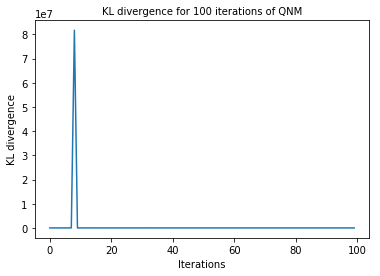

In [2]:
test1 = np.array([[1.,2.,3.,4.,5.],[6.,7.,8.,9.,10.],[11.,12.,13.,14.,15.],[16.,17.,18.,19.,20.],[21.,22.,23.,24.,25.]])
print 'test matrix 1:\n', test1

W,H,kl_div = qn(test1, max_iter = 100,rank = 3)

print '\ntest1 - WH:\n', test1 - W.dot(H)

plt.title("KL divergence for 100 iterations of QNM", fontsize=10)
plt.xlabel("Iterations", fontsize=10)
plt.ylabel("KL divergence", fontsize=10)
plt.plot(kl_div)
plt.show()

As we see, the KL divergence significantly drops to almost zero after several iterations, although there is some peak in the beginning. Let's plot KLD for the first 20 iterations and the last 80.

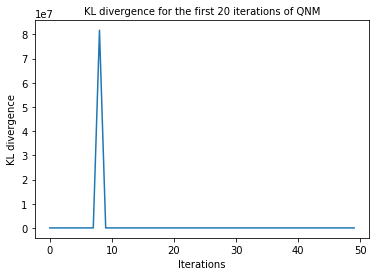

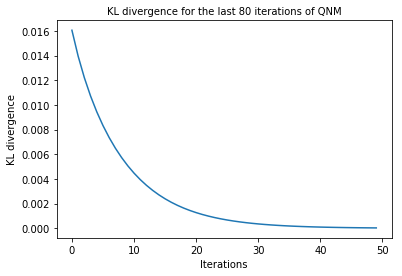

KL divergence on the last iteration: 3.108693009057362e-05


In [3]:
plt.title("KL divergence for the first 20 iterations of QNM", fontsize=10)
plt.xlabel("Iterations", fontsize=10)
plt.ylabel("KL divergence", fontsize=10)
plt.plot(kl_div[0:50])
plt.show()
plt.xlabel("Iterations", fontsize=10)
plt.ylabel("KL divergence", fontsize=10)
plt.title("KL divergence for the last 80 iterations of QNM", fontsize=10)
plt.plot(kl_div[50:])
plt.show()
print 'KL divergence on the last iteration:', kl_div[-1]

Let's do it one more time for another matrix, but this time let's try different sizes of $W$ and $H$.

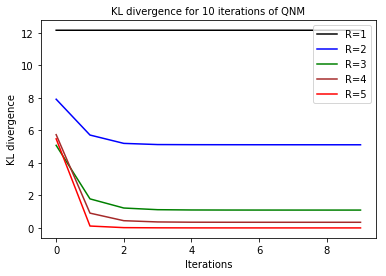

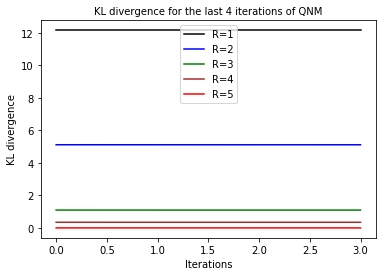

KL divergence on the last iteration:
  R=1: 12.150747509390195
  R=2: 5.110464060360395
  R=3: 1.0964636429292662
  R=4: 0.3462747791597245
  R=5: 4.466706280448207e-05


In [4]:
test2 = np.array([[5.,10.,10.,4.,7.,4.],[10.,7.,10.,15.,3.,8.],[10.,10.,10.,17.,6.,15.],[9.,15.,6.,10.,5.,16.],[12.,11.,10.,9.,8.,7.]])
W1,H1,kl_div1 = qn(test2,max_iter = 10,rank = 1)
W2,H2,kl_div2 = qn(test2,max_iter = 10,rank = 2)
W3,H3,kl_div3 = qn(test2,max_iter = 10,rank = 3)
W4,H4,kl_div4 = qn(test2,max_iter = 10,rank = 4)
W5,H5,kl_div5 = qn(test2,max_iter = 10,rank = 5)

plt.title("KL divergence for 10 iterations of QNM", fontsize=10)
plt.xlabel("Iterations", fontsize=10)
plt.ylabel("KL divergence", fontsize=10)
plt.plot(kl_div1, color='black', label='R=1')
plt.plot(kl_div2, color='blue', label='R=2')
plt.plot(kl_div3, color='green', label='R=3')
plt.plot(kl_div4, color='brown', label='R=4')
plt.plot(kl_div5, color='red', label='R=5')
plt.legend()
plt.show()

plt.title("KL divergence for the last 4 iterations of QNM", fontsize=10)
plt.xlabel("Iterations", fontsize=10)
plt.ylabel("KL divergence", fontsize=10)
plt.plot(kl_div1[6:], color='black', label='R=1')
plt.plot(kl_div2[6:], color='blue', label='R=2')
plt.plot(kl_div3[6:], color='green', label='R=3')
plt.plot(kl_div4[6:], color='brown', label='R=4')
plt.plot(kl_div5[6:], color='red', label='R=5')
plt.legend()
plt.show()

print 'KL divergence on the last iteration:'
print '  R=1:',kl_div1[-1]
print '  R=2:',kl_div2[-1]
print '  R=3:',kl_div3[-1]
print '  R=4:',kl_div4[-1]
print '  R=5:',kl_div5[-1]

It's pretty obvious that the greater $R$ we choose, the better approximation we get. If we want to approximate a $5 \times 6$ matrix (30 elements) with a $5 \times 1$ column multiplied by a $1 \times 6$ row (11 elements combined), then we shouldn't expect great results.